In [2]:
import pandas as pd
import numpy as np

## Pandas 將 None 與 float('NaN') 視為 遺失值

In [3]:
float(3)

3.0

In [4]:
float('3.4')

3.4

In [5]:
float('NaN')

nan

In [6]:
dfmm=pd.DataFrame( [ {'key':float('NaN'), 'data':8, 'price':80} , 
                     {'key':'B', 'data':7, 'price':50} ,
                     {'key':'C', 'data':12, 'price':None} ,                       
                     {'key':'A', 'data':9, 'price':80} ,
                     {'key':'B', 'data':5, 'price':float('NaN')},
                     {'key':4, 'data':6, 'price':70},
                     {'key':'12房', 'data':7, 'price':70},
                     {'key':'3房', 'data':9, 'price':90}
                   ]  
                 )
print(dfmm)

   data  key  price
0     8  NaN   80.0
1     7    B   50.0
2    12    C    NaN
3     9    A   80.0
4     5    B    NaN
5     6    4   70.0
6     7  12房   70.0
7     9   3房   90.0


In [7]:
dfmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
data     8 non-null int64
key      7 non-null object
price    6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [8]:
dfmm.loc[6,'key']

'12房'

In [9]:
dfmm.loc[6,'key'][0:2]

'12'

In [10]:
dfmm.loc[6,'key'][0:-1]

'12'

In [11]:
int(dfmm.loc[6,'key'][0:-1])

12

In [12]:
dfmm.loc[7,'key'][0:-1]

'3'

In [13]:
int(dfmm.loc[7,'key'][0:-1])

3

In [14]:
t=[] # t is an empty list , 空list
t.append(int(dfmm.loc[6,'key'][0:-1]))
print(t)
t.append(int(dfmm.loc[7,'key'][0:-1]))
print(t)

[12]
[12, 3]


## 用 df.isnull() 檢查遺失值

In [15]:
dfmm.isnull()

,data,key,price
0,False,True,False
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,True
5,False,False,False
6,False,False,False
7,False,False,False


In [16]:
dfmm

,data,key,price
0,8,NaN,80.0
1,7,B,50.0
2,12,C,NaN
3,9,A,80.0
4,5,B,NaN
5,6,4,70.0
6,7,12房,70.0
7,9,3房,90.0


In [17]:
dfmm=dfmm.dropna()
print(dfmm) 

   data  key  price
1     7    B   50.0
3     9    A   80.0
5     6    4   70.0
6     7  12房   70.0
7     9   3房   90.0


In [20]:
dfmm=dfmm.reset_index(drop=True)

In [21]:
dfmm

,data,key,price
0,7,B,50.0
1,9,A,80.0
2,6,4,70.0
3,7,12房,70.0
4,9,3房,90.0


In [22]:
dfmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
data     5 non-null int64
key      5 non-null object
price    5 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


## 用 numpy 產生 高斯分布random variable

In [23]:
radnum=np.random.normal(loc=0, scale=0.4, size=5)
print(radnum)

[ 0.2623476   0.3802507   0.22839217 -0.50739147 -0.53830219]


## 產生 新的欄位 new=data + random 
## note: data 與 new 有高度正相關喔 !!  

In [24]:
dfmm['new']=dfmm['data']+radnum

In [25]:
dfmm['new']

0    7.262348
1    9.380251
2    6.228392
3    6.492609
4    8.461698
Name: new, dtype: float64

In [26]:
dfmm

,data,key,price,new
0,7,B,50.0,7.262348
1,9,A,80.0,9.380251
2,6,4,70.0,6.228392
3,7,12房,70.0,6.492609
4,9,3房,90.0,8.461698


## 用 numpy 算  sum , mean , std 

In [27]:
np.sum(dfmm['new'])

37.82529681977302

In [28]:
np.std(dfmm['new'])

1.1939300225580751

In [29]:
new_mean=np.mean(dfmm['new'])
print(new_mean)

7.565059363954605


In [30]:
data_mean=np.mean(dfmm['data'])
print(data_mean)

7.6


In [32]:
dfmm.mean()

data      7.600000
price    72.000000
new       7.565059
dtype: float64

## 用 pandas 的 corr() : Return correlation coefficients

In [33]:
dfmm.corr()

,data,price,new
data,1.000000,0.678401,0.943708
price,0.678401,1.000000,0.532082
new,0.943708,0.532082,1.000000


## 用 numpy 的 corrcoef : Return correlation coefficients.

In [34]:
np.corrcoef(dfmm['new'], dfmm['data'])

array([[1.        , 0.94370784],
       [0.94370784, 1.        ]])

In [35]:
np.corrcoef(dfmm['price'], dfmm['data'])

array([[1.        , 0.67840053],
       [0.67840053, 1.        ]])

## 用 matplotlib 視覺化作圖

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.family']='DFKai-SB'

Text(0,0.5,'data')

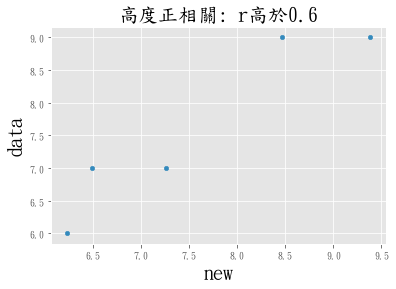

In [37]:
dfmm.plot(kind='scatter',x='new'  ,y='data' , figsize=(6,4))
plt.title('高度正相關: r高於0.6',color='black',size=20)
plt.xlabel('new',size=20,color='black')
plt.ylabel('data',color='black',size=20)

Text(0,0.5,'data')

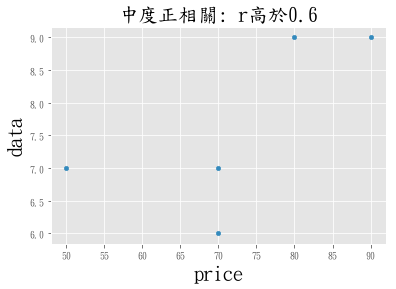

In [38]:
dfmm.plot(kind='scatter',x='price'  ,y='data' , figsize=(6,4))
plt.title('中度正相關: r高於0.6',color='black',size=20)
plt.xlabel('price',size=20,color='black')
plt.ylabel('data',color='black',size=20)